# Machine Learning Project Template
* This notebook provides a structured template for building an end-to-end machine learning project.
* Re-use this notebook througout your learning and in capstone project

## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>

### 1.1) Load Libraries
Import all necessary libraries for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [2]:
movie_df = pd.read_csv ('rotten_tomatoes_movies.csv')

In [3]:
movie_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
movie_df.shape

(17711, 22)

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17711 entries, 0 to 17710
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17711 non-null  object 
 1   movie_title                       17711 non-null  object 
 2   movie_info                        17390 non-null  object 
 3   critics_consensus                 9133 non-null   object 
 4   content_rating                    17711 non-null  object 
 5   genres                            17692 non-null  object 
 6   directors                         17517 non-null  object 
 7   authors                           16169 non-null  object 
 8   actors                            17359 non-null  object 
 9   original_release_date             16545 non-null  object 
 10  streaming_release_date            17327 non-null  object 
 11  runtime                           17397 non-null  float64
 12  prod

## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [6]:
print("Numrical Feature Summary:")
movie_df.describe()

Numrical Feature Summary:


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17397.000000,17667.000000,17667.00000,17415.000000,1.741400e+04,17711.000000,17711.000000,17711.000000
mean,102.213715,60.884587,57.14179,60.555154,1.439477e+05,14.587036,36.376094,20.703856
std,18.702997,28.444143,68.37147,20.543621,1.763628e+06,15.146481,52.602254,30.249138
min,5.000000,0.000000,5.00000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.00000,45.000000,7.072500e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.00000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.00000,78.000000,2.498950e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.00000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [7]:
print("\nMissing Values:")
missing_data = movie_df.isnull().sum()
missing_precent = (missing_data / len(movie_df)) * 100
M_df = pd.DataFrame({
    'Missing Count' : missing_data,
    'Missing Precentage' : missing_precent
}).sort_values('Missing Precentage', ascending = False)
print(M_df[M_df['Missing Count'] > 0])



Missing Values:
                        Missing Count  Missing Precentage
critics_consensus                8578           48.433177
authors                          1542            8.706454
original_release_date            1166            6.583479
production_company                499            2.817458
audience_status                   448            2.529501
streaming_release_date            384            2.168144
actors                            352            1.987465
movie_info                        321            1.812433
runtime                           314            1.772909
audience_count                    297            1.676924
audience_rating                   296            1.671278
directors                         194            1.095364
tomatometer_status                 44            0.248433
tomatometer_rating                 44            0.248433
tomatometer_count                  44            0.248433
genres                             19            0.1072

In [8]:
num_cols = movie_df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumerical Features:{list(num_cols)}")

for col in num_cols[:5]:
    print(f"\n {col} - Unique Values:{movie_df[col].nunique()}")
    print(movie_df[col].value_counts().head())


Numerical Features:['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']

 runtime - Unique Values:190
runtime
90.0     834
95.0     603
100.0    540
93.0     539
96.0     511
Name: count, dtype: int64

 tomatometer_rating - Unique Values:101
tomatometer_rating
100.0    964
50.0     438
88.0     408
67.0     396
83.0     396
Name: count, dtype: int64

 tomatometer_count - Unique Values:407
tomatometer_count
5.0    793
6.0    728
7.0    666
8.0    595
9.0    532
Name: count, dtype: int64

 audience_rating - Unique Values:98
audience_rating
71.0    323
72.0    321
75.0    319
79.0    313
78.0    304
Name: count, dtype: int64

 audience_count - Unique Values:11068
audience_count
5.0     24
11.0    22
6.0     20
71.0    19
7.0     18
Name: count, dtype: int64


In [9]:
cat_cols = movie_df.select_dtypes(include=['object']).columns
print(f"\nCategorical Features:{list(cat_cols)}")

for col in cat_cols[:5]:
    print(f"\n {col} - Unique Values:{movie_df[col].nunique()}")
    print(movie_df[col].value_counts().head())


Categorical Features:['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company', 'tomatometer_status', 'audience_status']

 rotten_tomatoes_link - Unique Values:17711
rotten_tomatoes_link
m/0814255                    1
m/phoenix_1998               1
m/phyllis_and_harold_2008    1
m/photographing_fairies      1
m/phone_booth                1
Name: count, dtype: int64

 movie_title - Unique Values:17105
movie_title
Hamlet                  6
Home                    5
Alice in Wonderland     4
The Three Musketeers    4
Robin Hood              4
Name: count, dtype: int64

 movie_info - Unique Values:17388
movie_info
Wisecracking mercenary Deadpool meets Russell, an angry teenage mutant who lives at an orphanage. When Russell becomes the target of Cable -- a genetically enhanced soldier from the future -- Deadpool realizes that he'll need some

### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

<Figure size 640x480 with 0 Axes>

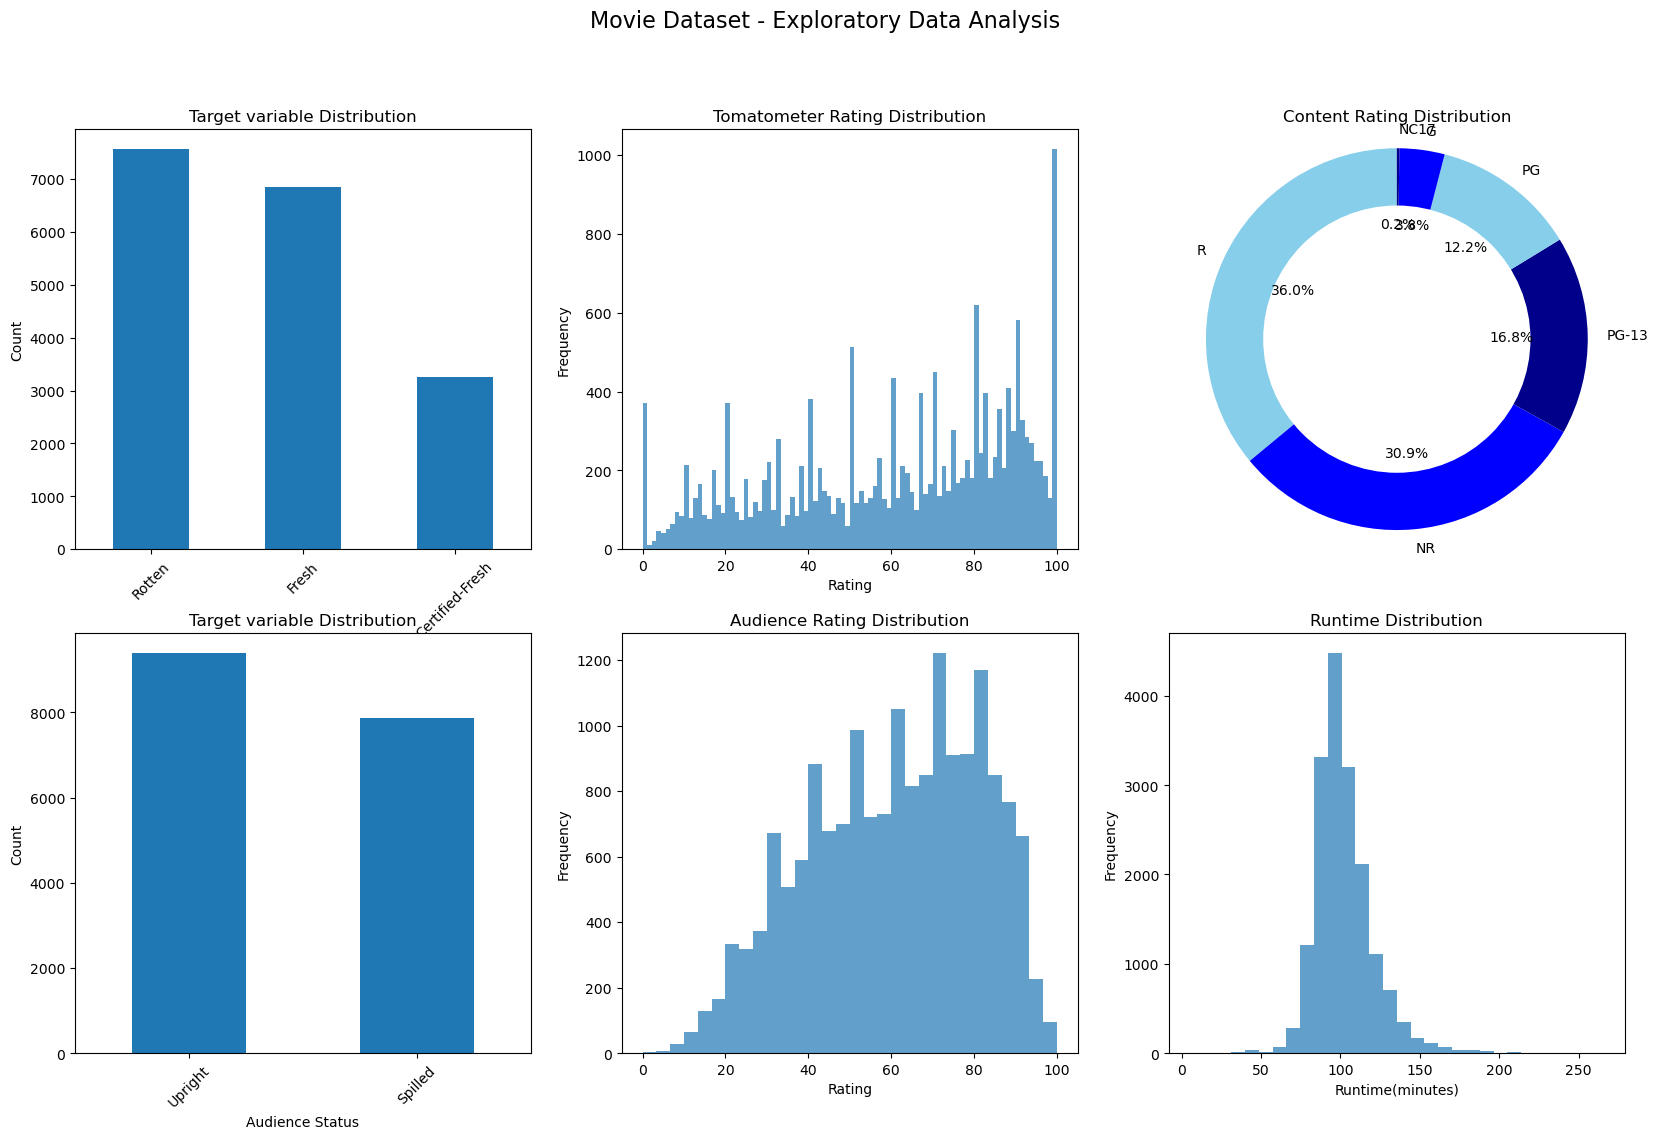

In [10]:
def data_visualizations(movie_df):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Movie Dataset - Exploratory Data Analysis', fontsize = 16)

    if 'tomatometer_status' in movie_df.columns:
        movie_df['tomatometer_status'].value_counts().plot(kind='bar', ax=axes[0,0])
        axes[0,0].set_title('Target variable Distribution')
        axes[0,0].set_xlabel('Tomatometer Status')
        axes[0,0].set_ylabel('Count')
        axes[0,0].tick_params(axis='x', rotation=45)

    if 'tomatometer_rating' in movie_df.columns:
        axes[0,1].hist(movie_df['tomatometer_rating'].dropna(), bins=90, alpha=0.7)
        axes[0,1].set_title('Tomatometer Rating Distribution')
        axes[0,1].set_xlabel('Rating')
        axes[0,1].set_ylabel('Frequency')

    if 'content_rating' in movie_df.columns:
        content_counts = movie_df['content_rating'].value_counts()
        blue_shades = ['skyblue', 'blue', 'darkblue']
        colors = (blue_shades * ((len(content_counts) // len(blue_shades)) + 1))[:len(content_counts)]
        axes[0,2].pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', 
                  startangle=90, colors=colors)
        axes[0,2].set_title('Content Rating Distribution')
    
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        axes[0,2].add_artist(centre_circle)
        axes[0,2].axis('equal')  
        

    if 'audience_status' in movie_df.columns:
        movie_df['audience_status'].value_counts().plot(kind='bar', ax=axes[1,0])
        axes[1,0].set_title('Target variable Distribution')
        axes[1,0].set_xlabel('Audience Status')
        axes[1,0].set_ylabel('Count')
        axes[1,0].tick_params(axis='x', rotation=45)

    if 'audience_rating' in movie_df.columns:
        axes[1,1].hist(movie_df['audience_rating'].dropna(), bins=30, alpha=0.7)
        axes[1,1].set_title('Audience Rating Distribution')
        axes[1,1].set_xlabel('Rating')
        axes[1,1].set_ylabel('Frequency')

    if 'runtime' in movie_df.columns:
        axes[1,2].hist(movie_df['runtime'].dropna(), bins=30, alpha=0.7)
        axes[1,2].set_title('Runtime Distribution')
        axes[1,2].set_xlabel('Runtime(minutes)')
        axes[1,2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


data_visualizations(movie_df)
        

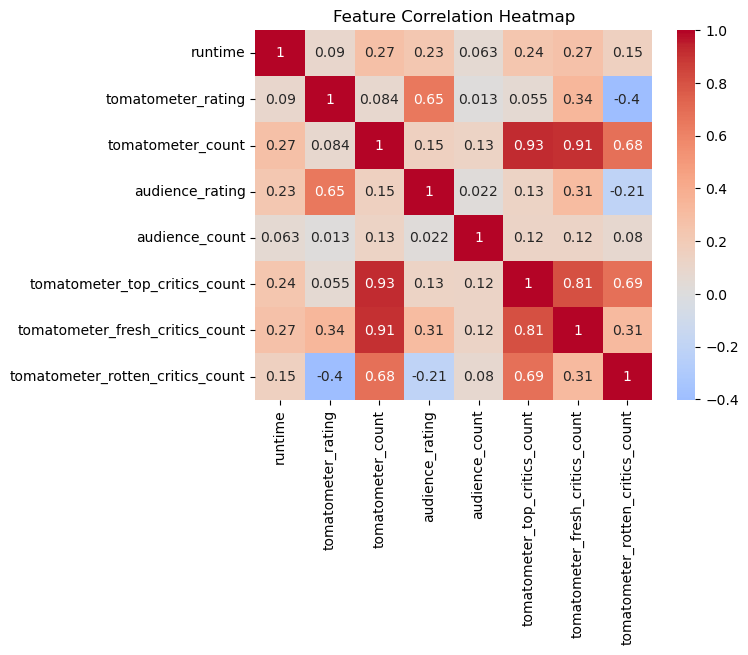

In [11]:
if len(num_cols) > 1:
    corr_matrix = movie_df[num_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()

In [12]:
movie_df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

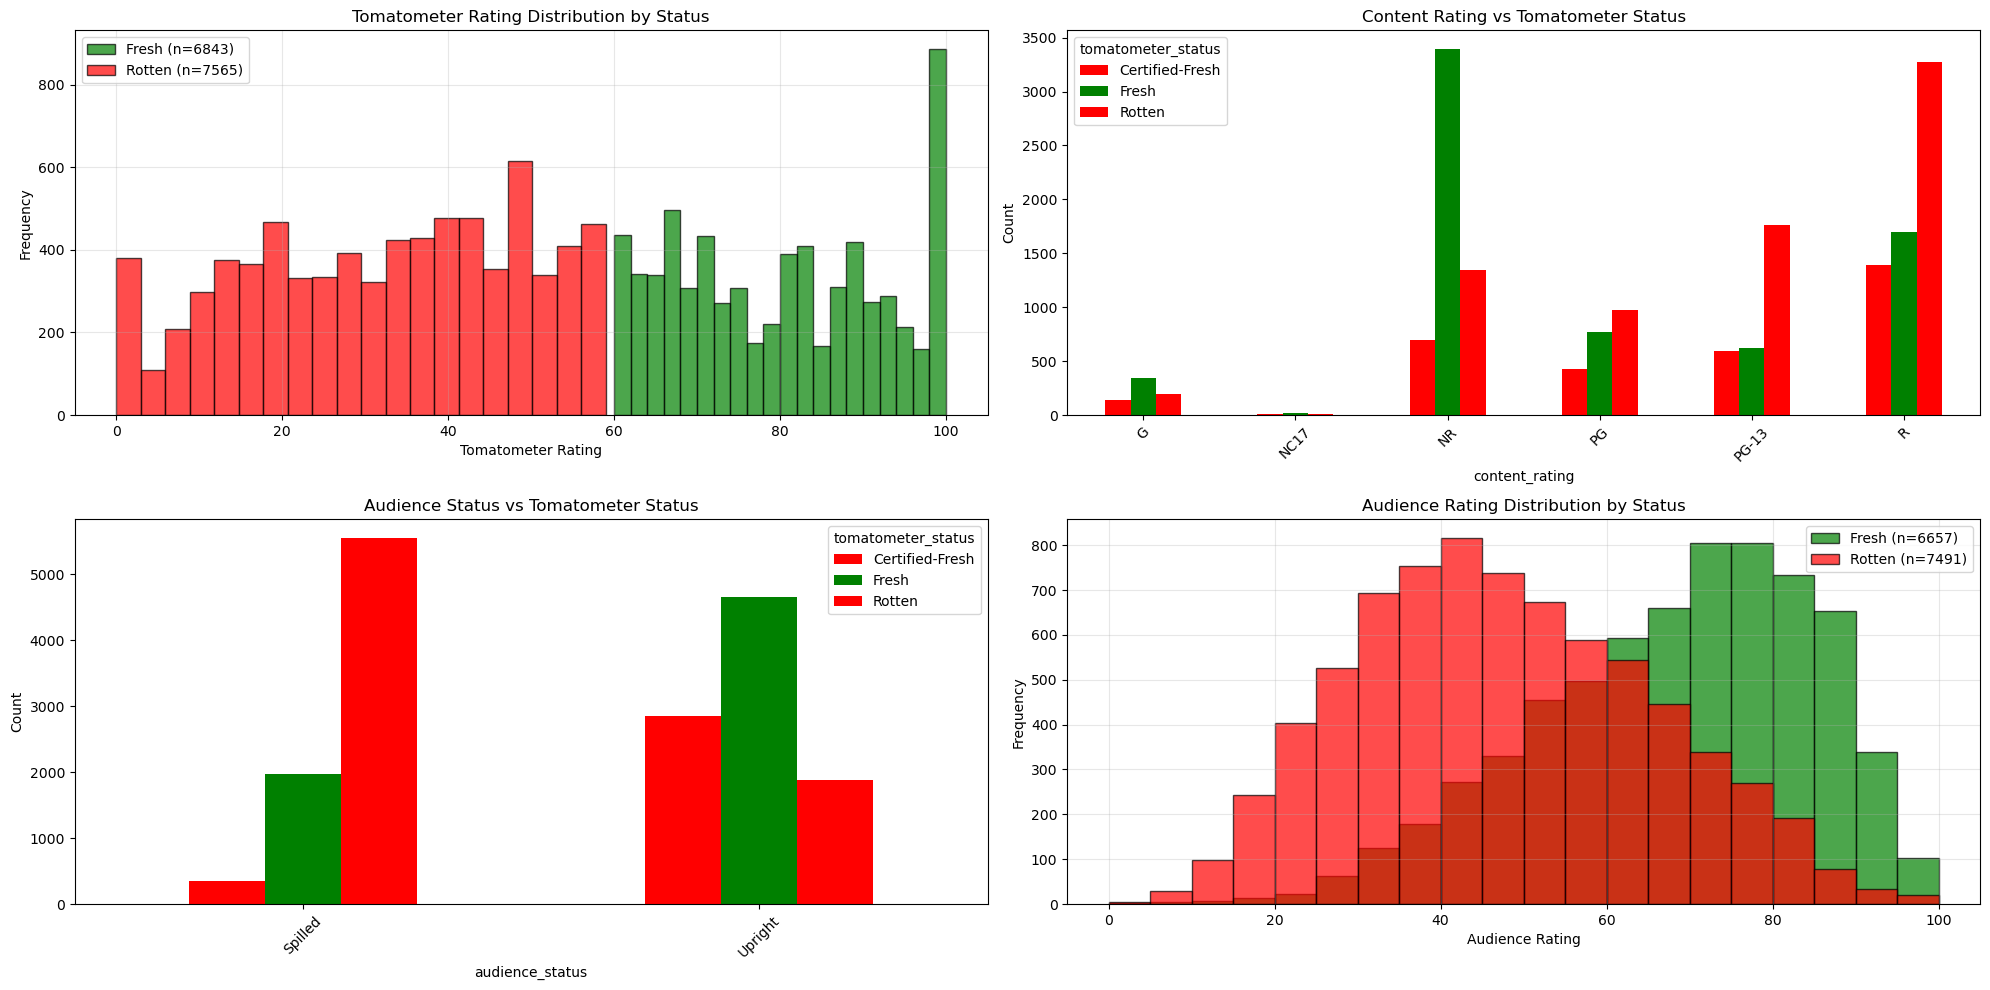

In [13]:
def analyze_key_features(movie_df):
    
    key_features = ['tomatometer_rating', 'content_rating', 'audience_status', 'audience_rating']
    
    if 'tomatometer_status' in movie_df.columns:
        df_fixed = movie_df.copy()
        
        if 'tomatometer_rating' in df_fixed.columns:
            if df_fixed['tomatometer_rating'].max() <= 1.0:
                df_fixed['tomatometer_rating'] = df_fixed['tomatometer_rating'] * 100
    
        if 'audience_rating' in df_fixed.columns:
            max_audience = df_fixed['audience_rating'].max()
            if max_audience <= 5.0:
                df_fixed['audience_rating'] = (df_fixed['audience_rating'] / max_audience) * 100
            elif max_audience <= 10.0:
                df_fixed['audience_rating'] = (df_fixed['audience_rating'] / 10) * 100
        
        plt.figure(figsize=(20, 10))
        
        for i, feature in enumerate(key_features, 1):
            if feature in df_fixed.columns:
                plt.subplot(2, 2, i)
                
                if feature in ['tomatometer_rating', 'audience_rating']:
                    fresh_mask = df_fixed['tomatometer_status'] == 'Fresh'
                    rotten_mask = df_fixed['tomatometer_status'] == 'Rotten'
                    
                    fresh_data = df_fixed[fresh_mask][feature].dropna()
                    rotten_data = df_fixed[rotten_mask][feature].dropna()
                    
                    if len(fresh_data) > 0:
                        plt.hist(fresh_data, alpha=0.7, label=f'Fresh (n={len(fresh_data)})', 
                                bins=20, color='green', edgecolor='black')
                    
                    if len(rotten_data) > 0:
                        plt.hist(rotten_data, alpha=0.7, label=f'Rotten (n={len(rotten_data)})', 
                                bins=20, color='red', edgecolor='black')
                    
                    plt.xlabel(feature.replace('_', ' ').title())
                    plt.ylabel('Frequency')
                    plt.title(f'{feature.replace("_", " ").title()} Distribution by Status')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
                    
                else:
                    cross_tab = pd.crosstab(df_fixed[feature], df_fixed['tomatometer_status'])
                    cross_tab.plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
                    plt.title(f'{feature.replace("_", " ").title()} vs Tomatometer Status')
                    plt.xticks(rotation=45)  # Fixed the syntax error
                    plt.ylabel('Count')
                    
        plt.tight_layout()
        plt.show()
    
    else:
        print("ERROR: 'tomatometer_status' column not found in dataframe")
        print("Available columns:", df.columns.tolist())
analyze_key_features(movie_df)

## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

In [14]:
numerical_cols = ['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
print(movie_df[numerical_cols].isnull().sum())

runtime                             314
tomatometer_rating                   44
tomatometer_count                    44
audience_rating                     296
audience_count                      297
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64


In [15]:
numerical_cols = movie_df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    if movie_df[col].isnull().sum() > 0:
        movie_df[col] = movie_df[col].fillna(movie_df[col].median())
        print(f"Filled {col} missing values with median")

Filled runtime missing values with median
Filled tomatometer_rating missing values with median
Filled tomatometer_count missing values with median
Filled audience_rating missing values with median
Filled audience_count missing values with median


In [16]:
print(movie_df[numerical_cols].isnull().sum())

runtime                             0
tomatometer_rating                  0
tomatometer_count                   0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64


In [17]:
print("\nHandling Outliers")
for col in numerical_cols:
    if col not in ['tomatometer_rating', 'audience_rating']:
        Q1 = movie_df[col].quantile(0.25)
        Q3 = movie_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = movie_df[(movie_df[col] < lower_bound)| ( movie_df[col] > upper_bound)]
        if len(outliers) > 0:
            print(f"Found {len(outliers)} outliers in {col}")
            movie_df[col] = movie_df[col].clip(lower=lower_bound, upper = upper_bound)
print(f"Cleaned dataset shape: {movie_df.shape}")


Handling Outliers
Found 690 outliers in runtime
Found 1419 outliers in tomatometer_count
Found 2758 outliers in audience_count
Found 299 outliers in tomatometer_top_critics_count
Found 1666 outliers in tomatometer_fresh_critics_count
Found 2035 outliers in tomatometer_rotten_critics_count
Cleaned dataset shape: (17711, 22)


- Numerical Features:['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


- Categorical Features:['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company', 'tomatometer_status', 'audience_status']


In [18]:
def feature_eng ( movie_df):
    if 'tomatometer_status' in movie_df.columns:
        movie_df['target'] = (movie_df['tomatometer_status'] == 'Fresh').astype(int)
        print("Created binary target variable")

    if 'runtime' in movie_df.columns:
        movie_df['runtime_cat'] = pd.cut(movie_df['runtime'],
                                         bins=[0, 90, 120, 180, 300],
                                         labels=['Short', 'Mediam', 'Long', 'Vary_long'])
        print("Created runtime categories")

    if 'genres' in movie_df.columns:
        genre_clean = movie_df['genres'].str.get_dummies(sep=',')
        movie_df = pd.concat([movie_df, genre_clean.add_prefix('genre_')], axis=1)
        print(f"Created {len(genre_clean.columns)} genre features")

    if 'content_rating' in movie_df.columns:
        C_rating = { 'G':1, 'PG':2, 'PG-13':3, 'R':4, 'NC-17':5}
        movie_df['contant_rating_encode'] = movie_df['content_rating'].map(C_rating).fillna(0)
        print("Encoded content rating")

    if 'audience_status' in movie_df.columns:
        movie_df['audience_status'] = (movie_df['audience_status'] == 'Upright').astype(int)
        print("Encoded audiance status")
    return movie_df 


feature_eng (movie_df)

Created binary target variable
Created runtime categories
Created 37 genre features
Encoded content rating
Encoded audiance status


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,genre_Horror,genre_Kids & Family,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Television,genre_Western,contant_rating_encode
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,...,0,0,0,0,0,0,0,0,0,2.0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,...,0,0,0,0,0,0,0,0,0,4.0
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,...,0,0,0,0,0,0,0,0,0,4.0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,...,0,0,0,0,0,0,0,0,0,0.0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17706,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",10/2/1981,...,0,0,0,0,0,0,0,0,0,4.0
17707,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",3/4/2016,...,0,0,0,0,0,0,0,0,0,2.0
17708,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",12/17/1964,...,0,0,0,0,0,0,0,0,0,0.0
17709,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",6/17/1964,...,0,0,0,0,0,0,0,0,0,2.0


### 3.1) Feature Selection
Select the most relevant features for the model.

In [19]:
feature_columns = [
        'tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count',
        'audience_count', 'release_year', 'release_month', 'content_rating_encoded',
        'audience_status_encoded', 'tomatometer_top_critics_count',
        'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
        'rating_difference', 'rating_ratio']

feature_columns = [col for col in feature_columns if col in movie_df.columns]

X = movie_df[feature_columns]
y = movie_df['target']

print("Initial feature count:", len(feature_columns))
print("Selected features:", feature_columns)



Initial feature count: 8
Selected features: ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']


In [20]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)

mask = selector.get_support()

selected_feature = X.columns[mask].tolist()
print("Features that pass variance threshold:", selected_feature)
print(f"Number of features passing threshold: {len(selected_feature)}")


Features that pass variance threshold: ['tomatometer_rating', 'audience_rating', 'runtime', 'tomatometer_count', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
Number of features passing threshold: 8


In [21]:
from sklearn.feature_selection import SelectKBest, chi2

def select_top_features(X, y, selected_feature):
    X_selected = X[selected_feature]
    selector_chi2 = SelectKBest(chi2, k=min(20, len(selected_feature)))
    X_chi2 = selector_chi2.fit_transform(X_selected, y)
    top_features = X_selected.columns[selector_chi2.get_support()].tolist()
    print(f"Top {len(top_features)} features selected:")
    
    for i, feature in enumerate(top_features, 1):
        print(f"{i:2d}. {feature}")
    
    return X_selected[top_features], y, top_features
select_top_features(X, y, selected_feature)

Top 8 features selected:
 1. tomatometer_rating
 2. audience_rating
 3. runtime
 4. tomatometer_count
 5. audience_count
 6. tomatometer_top_critics_count
 7. tomatometer_fresh_critics_count
 8. tomatometer_rotten_critics_count


(       tomatometer_rating  audience_rating  runtime  tomatometer_count  \
 0                    49.0             53.0    119.0              149.0   
 1                    87.0             64.0     90.0              142.0   
 2                    67.0             53.0    122.0               24.0   
 3                   100.0             97.0     95.0               54.0   
 4                    89.0             74.0    127.0               27.0   
 ...                   ...              ...      ...                ...   
 17706                56.0             74.0    104.0                9.0   
 17707                98.0             92.0    108.0              169.5   
 17708                80.0             86.0    140.0               10.0   
 17709                96.0             91.0    135.0               23.0   
 17710                50.0             62.0    121.0                8.0   
 
        audience_count  tomatometer_top_critics_count  \
 0             58053.5                   

### 3.2) Data Transforms
Apply transformations to prepare the data for modeling.

In [22]:
def data_transforms(X):
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    print(" Created preprocessing pipeline with:")
    print("- Median imputation for missing values")
    print("- Standard scaling for normalization")
    
    return preprocessor

data_transforms(X)

 Created preprocessing pipeline with:
- Median imputation for missing values
- Standard scaling for normalization


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

## <b> <font color=green> STEP (4)  ML Model Selection & Evaluation </font> </b>

### 4.1) Split-out Validation Dataset
Split the dataset into training and validation sets.

### 4.2) Test Options and Evaluation Metric
Define the evaluation metric for the model.

### 4.3) Spot Check Algorithms
Test multiple algorithms to identify the best-performing one.

## <b> <font color=green> STEP (5)  Performance Tuning & Optimization </font> </b>

### 5.1) Algorithm Tuning
Optimize hyperparameters for better performance.

### 5.2) Ensembles
Combine multiple models to improve accuracy.

## <b> <font color=green> STEP (6) Results Interpretation & Deployment </font> </b>

### 6.1) Predictions on Validation Dataset
Make predictions using the validation dataset.

### 6.2) Create Standalone Model on Entire Training Dataset
Train the final model on the entire dataset.

### 6.3) Save Model for Later Use
Save the trained model to a file.